In [ ]:
import cv2
import numpy as np
import os
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
CHECKERBOARD = (3,7)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


objpoints = []
imgpoints = []



objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

path="/content/drive/MyDrive/cv ass2/images/"

images = glob.glob(path+"*.jpg")

print(images)




['/content/drive/MyDrive/cv ass2/images/IMG_7281.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7275.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7290.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7282.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7279.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7277.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7292.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7297.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7299.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7280.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7287.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7301.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7296.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7293.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7286.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7289.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7284.jpg', '/content/drive/MyDrive/cv ass2/images/IMG_7295.jpg', '/content/drive/MyDrive/cv 

In [ ]:

for fname in images:
    img = cv2.imread(fname)

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+
    	cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)


    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2,ret)

In [ ]:
h,w = img.shape[:2]
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

print("Camera matrix : \n")
print(mtx)

Camera matrix : 

[[887.63361768   0.         583.72520646]
 [  0.         792.17411885 390.42828058]
 [  0.           0.           1.        ]]


Camera's intrinsic Matrix:

[ fx s ux

  0 fy uy
  
  0  0 1]



In [ ]:
dist

array([[ 1.56485640e-01, -1.37284861e+00,  1.48242323e-03,
        -4.71475474e-03,  3.24383382e+00]])

In [ ]:
objpoints = np.array(objpoints)
imgpoints = np.array(imgpoints)

In [ ]:

camera_matrix=mtx
dist_coeffs=dist

In [ ]:
len(rvecs)

20

In [ ]:
for i in range(len(rvecs)):
    rvec = rvecs[i]
    tvec = tvecs[i]

    R, _ = cv2.Rodrigues(rvec)

    extrinsic_matrix = np.hstack((R, tvec))
    print(f"Rotation matrix (R) for image {i + 1}:\n", R)
    print(f"Translation vector (T) for image {i + 1}:\n", tvec)
    print(f"Extrinsic parameters for image {i + 1}:\n", extrinsic_matrix)
    print("\n")

Rotation matrix (R) for image 1:
 [[ 0.00695805 -0.99989627  0.01261055]
 [ 0.99810015  0.00617241 -0.06130247]
 [ 0.06121827  0.01301314  0.99803957]]
Translation vector (T) for image 1:
 [[ 3.3067295 ]
 [-0.05750608]
 [12.23051961]]
Extrinsic parameters for image 1:
 [[ 6.95804610e-03 -9.99896274e-01  1.26105478e-02  3.30672950e+00]
 [ 9.98100150e-01  6.17240935e-03 -6.13024708e-02 -5.75060774e-02]
 [ 6.12182747e-02  1.30131350e-02  9.98039569e-01  1.22305196e+01]]


Rotation matrix (R) for image 2:
 [[ 0.02428623 -0.81648714 -0.57685261]
 [ 0.99818316  0.05163219 -0.03105631]
 [ 0.05514125 -0.57505032  0.81625766]]
Translation vector (T) for image 2:
 [[ 5.67515414]
 [-1.86674272]
 [14.19683985]]
Extrinsic parameters for image 2:
 [[ 0.02428623 -0.81648714 -0.57685261  5.67515414]
 [ 0.99818316  0.05163219 -0.03105631 -1.86674272]
 [ 0.05514125 -0.57505032  0.81625766 14.19683985]]


Rotation matrix (R) for image 3:
 [[-0.03312423 -0.87371854  0.48530269]
 [ 0.98057598  0.06551265  

In [ ]:
from google.colab.patches import cv2_imshow

original image


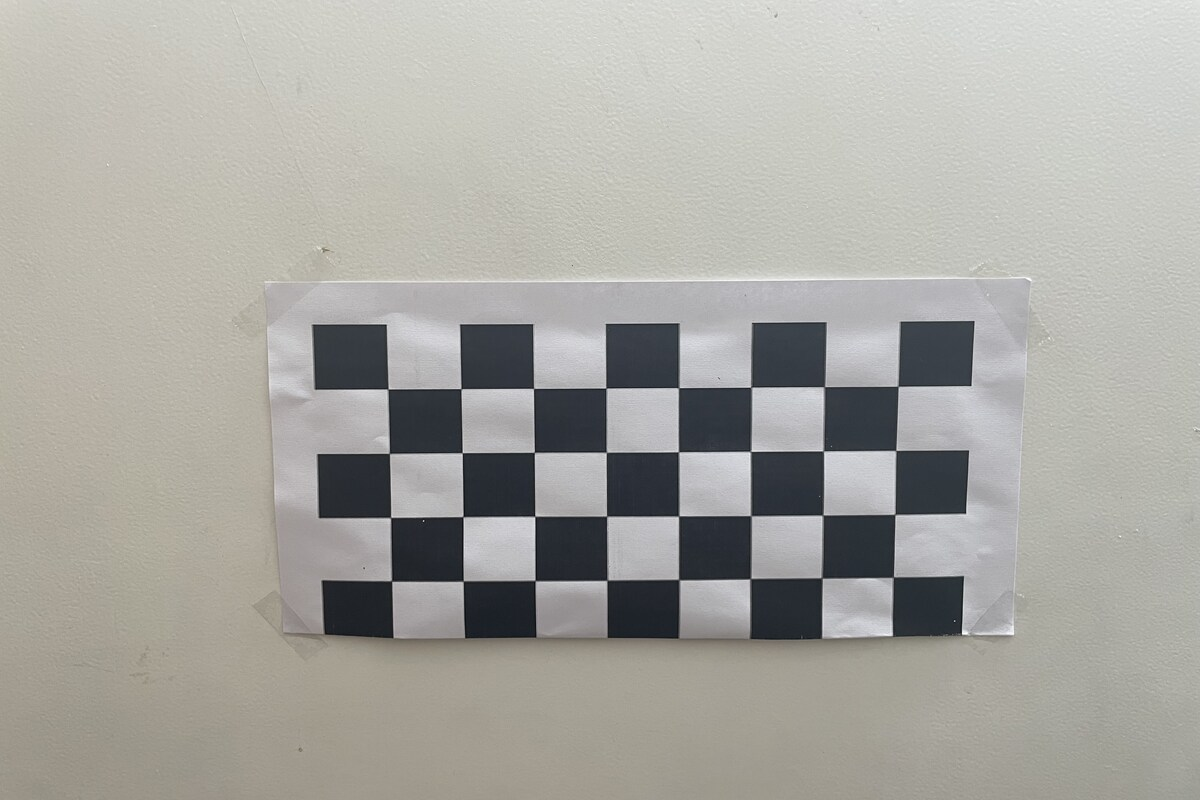

undistorted image


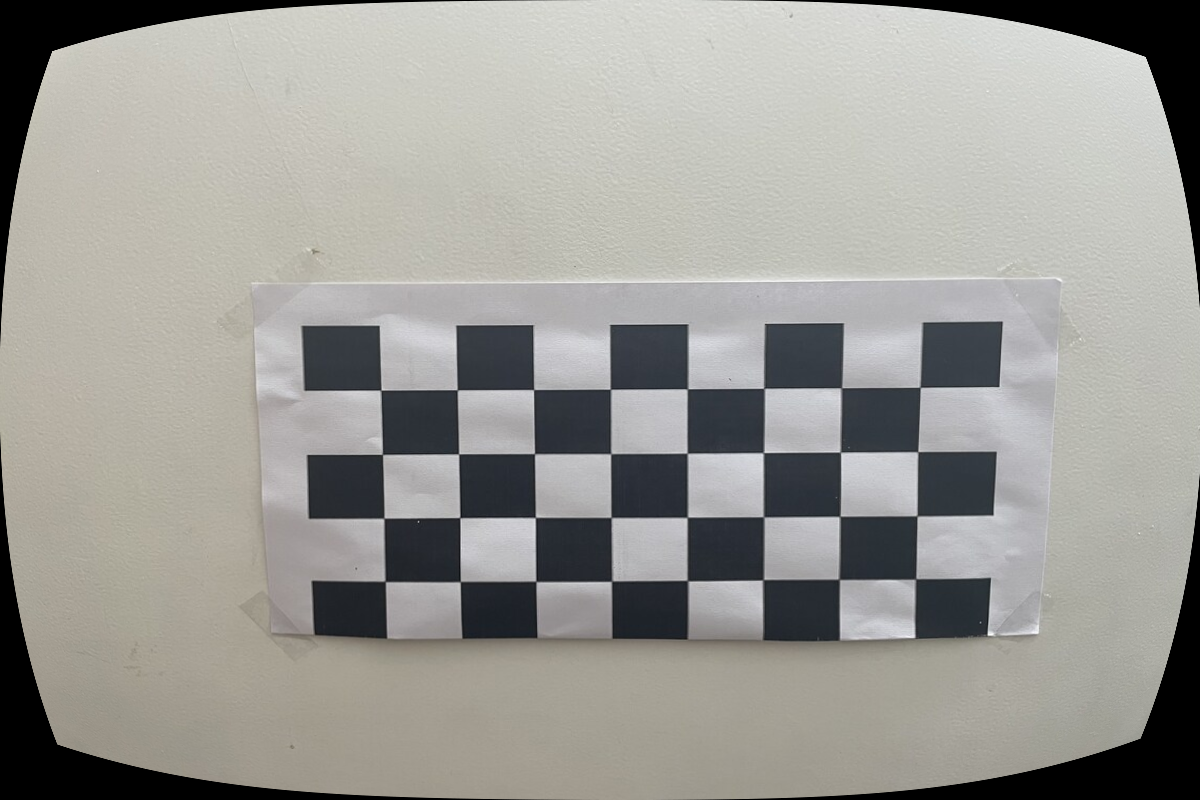

In [ ]:
img = cv2.imread(images[0])

newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

print("original image")
cv2_imshow(img)


print("undistorted image")
cv2_imshow(dst)

Estimated radial distortion coefficients: [ 0.15648564 -1.37284861]


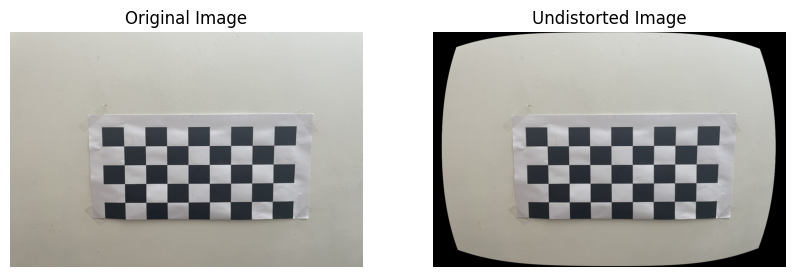

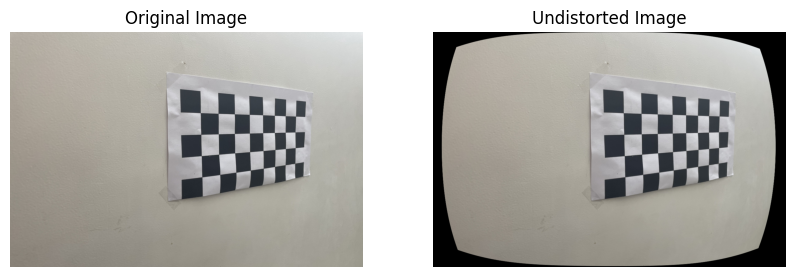

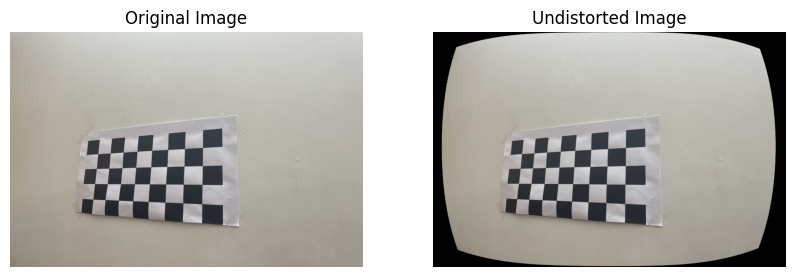

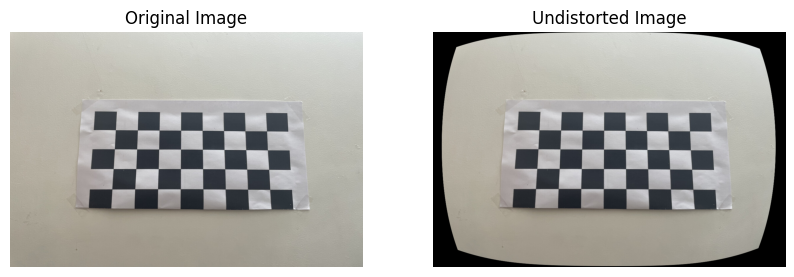

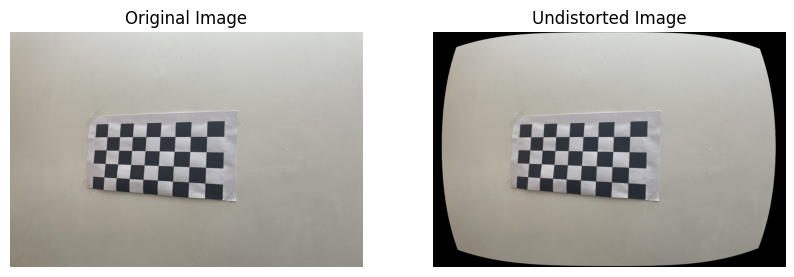

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt




print("Estimated radial distortion coefficients:", dist[0][0:2])

for i in range(5):
    img = cv2.imread(images[i])
    dst = cv2.undistort(img, mtx, dist, None, None)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    # Plot the original and undistorted images
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(dst_rgb)
    plt.title("Undistorted Image")
    plt.axis('off')

    plt.show()




Re-projection error for image 1: 0.048799741977122287
Re-projection error for image 2: 0.1658090157632064
Re-projection error for image 3: 0.1249071551320106
Re-projection error for image 4: 0.05650986094138609
Re-projection error for image 5: 0.08146816201656373
Re-projection error for image 6: 0.11941662651985496
Re-projection error for image 7: 0.0927551827486617
Re-projection error for image 8: 0.0608631948643079
Re-projection error for image 9: 0.06295152619535126
Re-projection error for image 10: 0.040670051797846996
Re-projection error for image 11: 0.1154187302492298
Re-projection error for image 12: 0.11051745531303825
Re-projection error for image 13: 0.11059796117614659
Re-projection error for image 14: 0.06986034013329698
Re-projection error for image 15: 0.06433914667390382
Re-projection error for image 16: 0.08335249233897327
Re-projection error for image 17: 0.13772561857297103
Re-projection error for image 18: 0.09117186558496566
Re-projection error for image 19: 0.0550

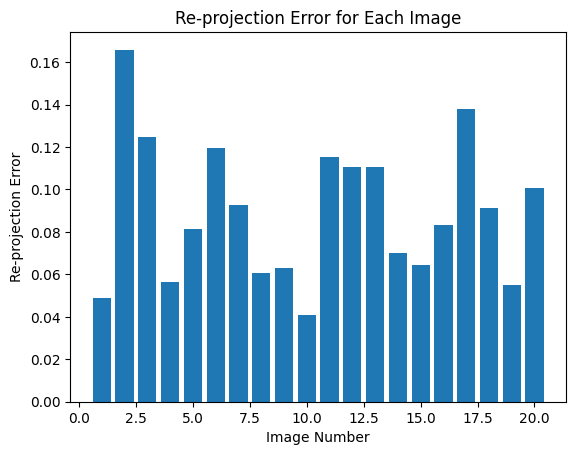

Mean re-projection error: 0.08964283027723577
Standard deviation of re-projection error: 0.032372036239173715


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'objpoints' and 'imgpoints' are lists of object points and image points for all images
# Assuming 'mtx' and 'dist' are the camera matrix and distortion coefficients
# Assuming 'rvecs' and 'tvecs' are lists of rotation and translation vectors for each image

errors = []
for i in range(20):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    errors.append(error)

# Report the re-projection error for each image
for i, error in enumerate(errors):
    print(f"Re-projection error for image {i+1}: {error}")

# Plot the error using a bar chart
plt.bar(range(1, 21), errors)
plt.xlabel("Image Number")
plt.ylabel("Re-projection Error")
plt.title("Re-projection Error for Each Image")
plt.show()

# Report the mean and standard deviation of the re-projection error
mean_error = np.mean(errors)
std_error = np.std(errors)
print(f"Mean re-projection error: {mean_error}")
print(f"Standard deviation of re-projection error: {std_error}")


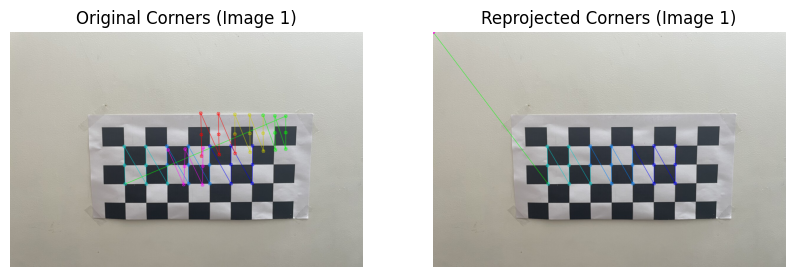

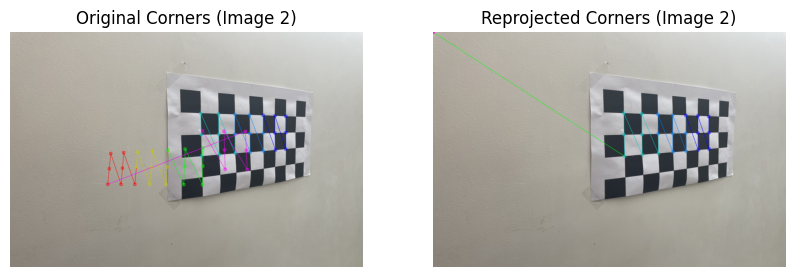

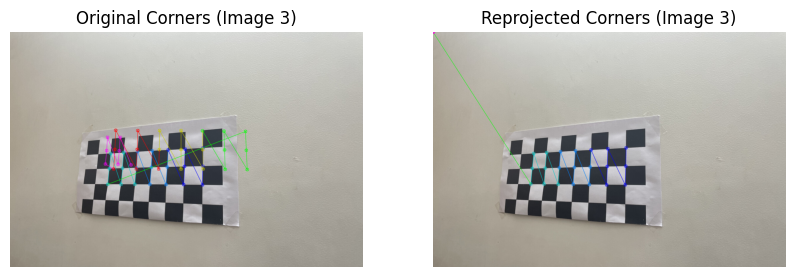

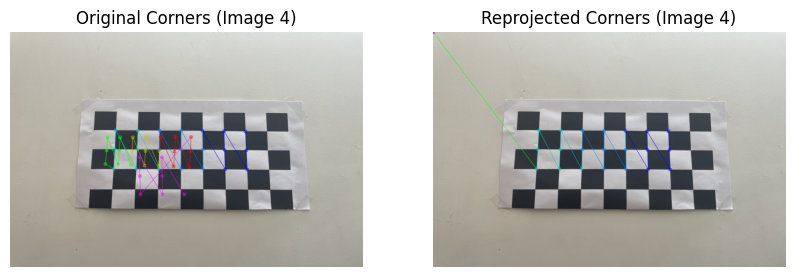

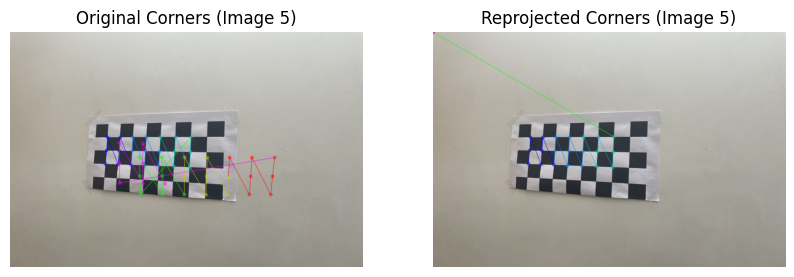

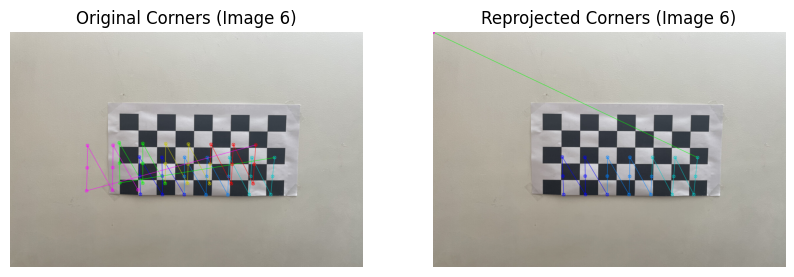

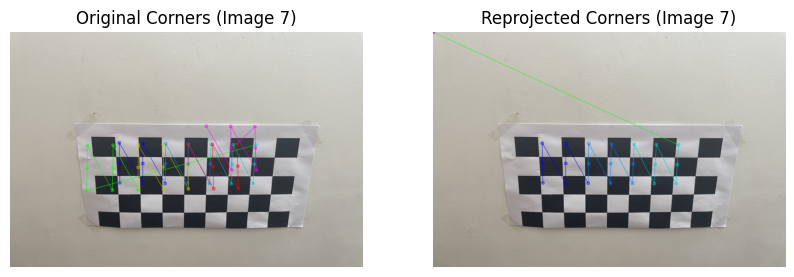

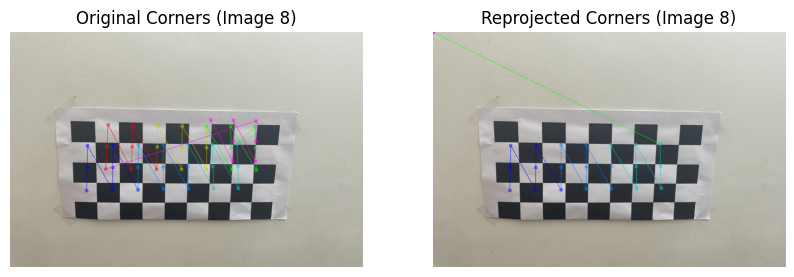

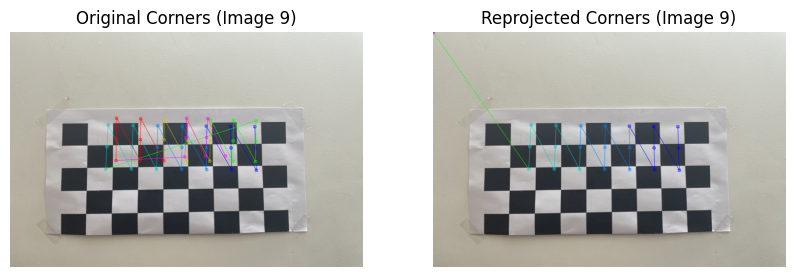

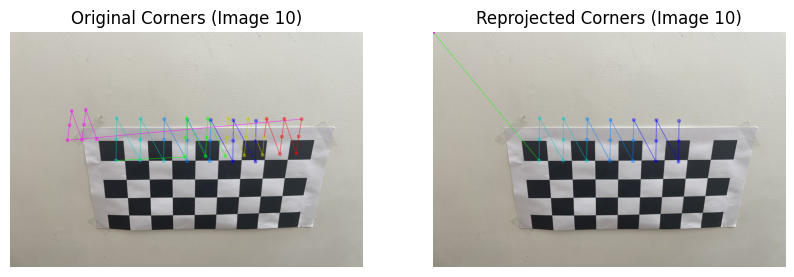

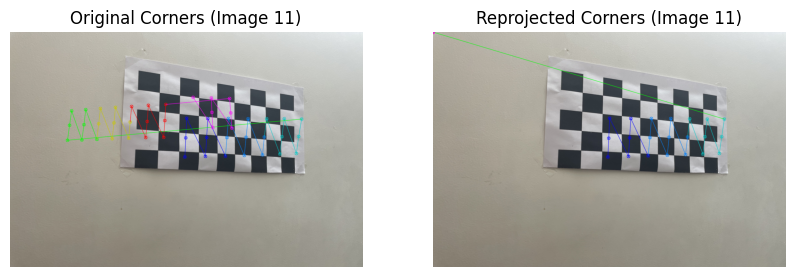

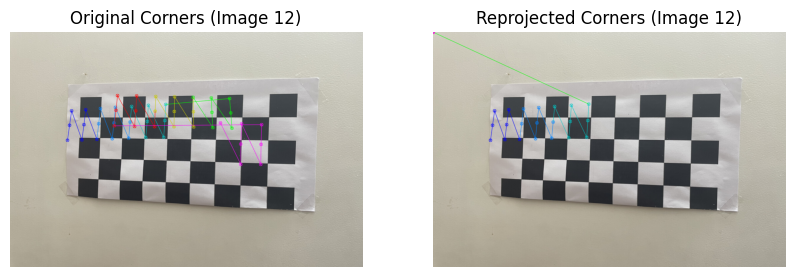

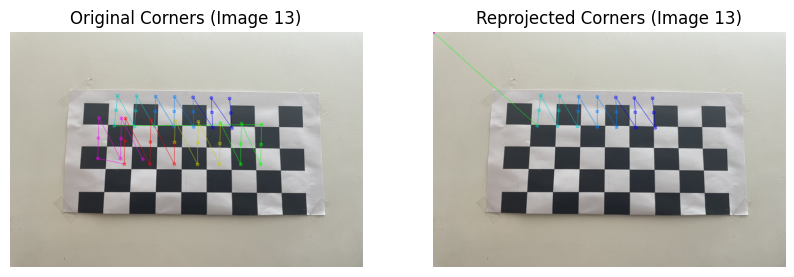

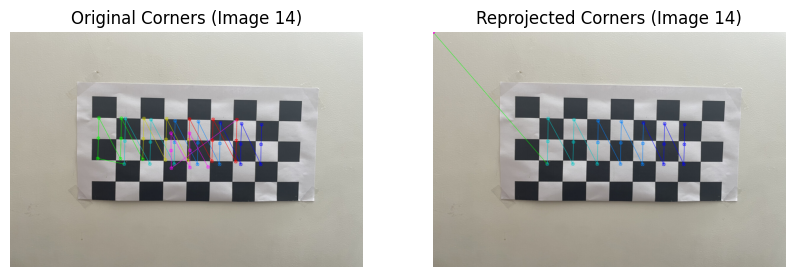

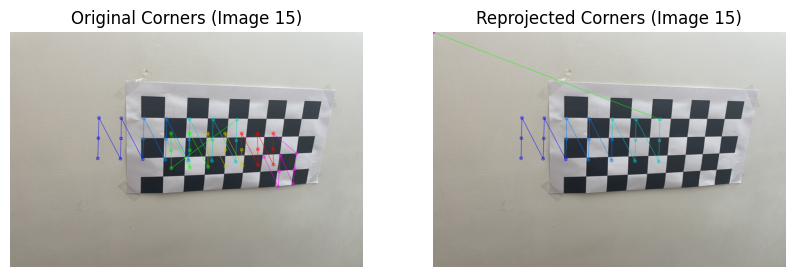

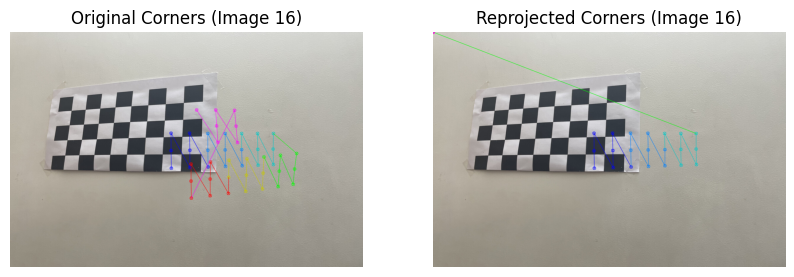

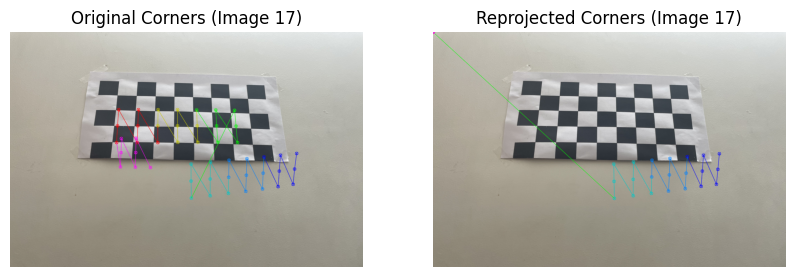

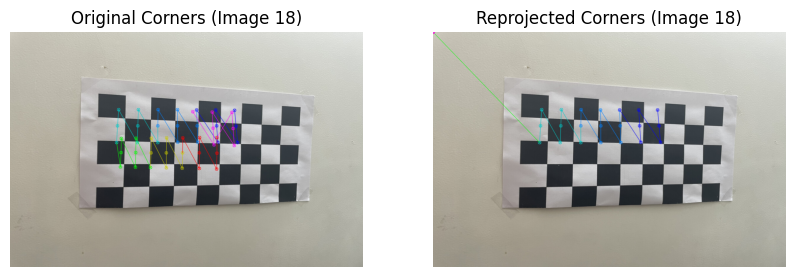

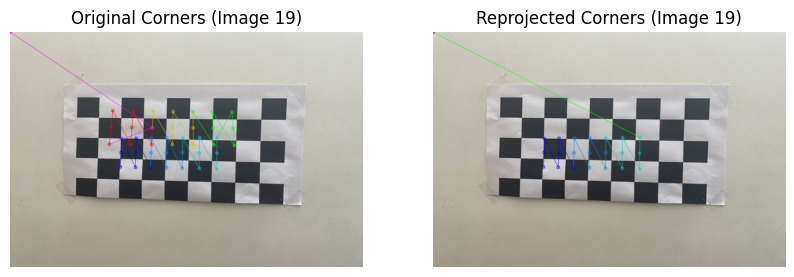

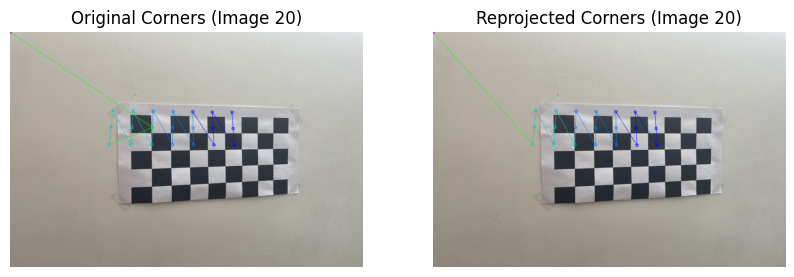

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


for i in range(20):
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_corners = cv2.drawChessboardCorners(img.copy(), (7,7), imgpoints[i], True)


    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    img_reprojected = cv2.drawChessboardCorners(img.copy(), (7,7), imgpoints2, True)


    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_corners)
    plt.title(f"Original Corners (Image {i+1})")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_reprojected)
    plt.title(f"Reprojected Corners (Image {i+1})")
    plt.axis('off')

    plt.show()


In [ ]:
import numpy as np


plane_normals = []

for i in range(20):
    # Convert rotation vector to rotation matrix
    R, _ = cv2.Rodrigues(rvecs[i])

    # The normal to the checkerboard plane in the camera coordinate frame is the third column of the rotation matrix
    normal = R[:, 2]

    # Normalize the normal vector
    normal = normal / np.linalg.norm(normal)

    plane_normals.append(normal)

    print(f"Normal for image {i+1}: {normal}")


Normal for image 1: [ 0.01261055 -0.06130247  0.99803957]
Normal for image 2: [-0.57685261 -0.03105631  0.81625766]
Normal for image 3: [0.48530269 0.18487522 0.85457735]
Normal for image 4: [-0.01733042  0.1758625   0.98426218]
Normal for image 5: [0.38771054 0.08838245 0.91753424]
Normal for image 6: [ 0.00186225 -0.23397073  0.97224186]
Normal for image 7: [-0.04248805 -0.13770194  0.989562  ]
Normal for image 8: [-0.02714827  0.08293133  0.99618541]
Normal for image 9: [-0.02071462  0.13381895  0.99078928]
Normal for image 10: [-0.05488754 -0.01376584  0.99839765]
Normal for image 11: [-0.25104458 -0.22361144  0.94179326]
Normal for image 12: [0.31491853 0.1836567  0.93118019]
Normal for image 13: [-0.0513889   0.35413551  0.93378114]
Normal for image 14: [-0.25629906 -0.00331459  0.96659185]
Normal for image 15: [0.09093132 0.00141868 0.99585616]
Normal for image 16: [-0.26689751 -0.00563037  0.96370847]
Normal for image 17: [-0.27405944 -0.22127256  0.93591125]
Normal for image 1